In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [71]:
# PlummerTwoParticles = np.loadtxt("./plummer_2.dat", skiprows=5)
SolarSystem = np.loadtxt("./sol_system.dat", skiprows=5)
ChainPlummer = np.loadtxt("./plummer_chain.dat", skiprows=5)


In [13]:
PosParticleOne = PlummerTwoParticles[:, 1:4]
PosParticleTwo = PlummerTwoParticles[:, 9:12]


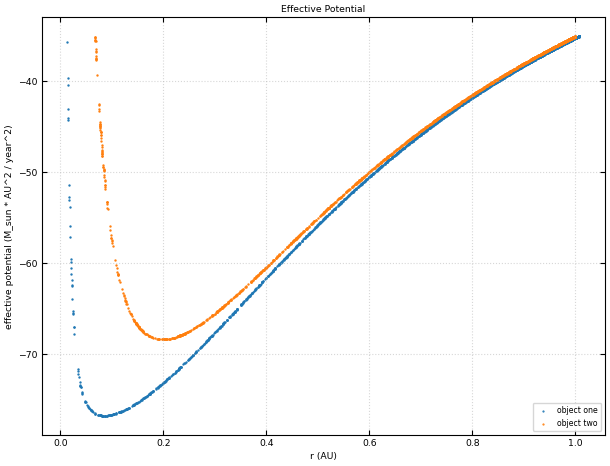

In [17]:
# energy plot
plt.scatter(np.linalg.norm(PosParticleOne, axis=-1), PlummerTwoParticles[:, 7], s=.5, label="object one")
plt.scatter(np.linalg.norm(PosParticleTwo, axis=-1), PlummerTwoParticles[:, 15], s=.5, label="object two")
plt.title("Effective Potential")
plt.xlabel("r (AU)")
plt.ylabel("effective potential (M_sun * AU^2 / year^2)")
plt.legend()
plt.grid()
# plt.savefig("effective-potential.png", dpi=300)
plt.show()


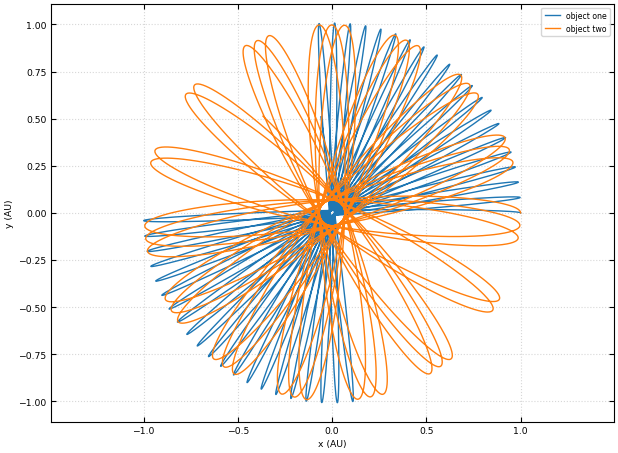

In [24]:
# orbit plot
plt.axis('equal')
plt.plot(PlummerTwoParticles[:, 1], PlummerTwoParticles[:, 2], lw=1, alpha=1, label="object one")
plt.plot(PlummerTwoParticles[:, 9], PlummerTwoParticles[:, 10], lw=1, alpha=1, label="object two")
# plt.scatter(0, 0, s=35, c='r', label="the Sun")
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
# plt.title("Earth Orbit, dt = 1e-1 year, equal axis scale")
plt.legend()
plt.grid()
# plt.savefig("plummer-two-orbits.png", dpi=300)
plt.show()


In [28]:
SolarSystem.shape


(2000, 73)

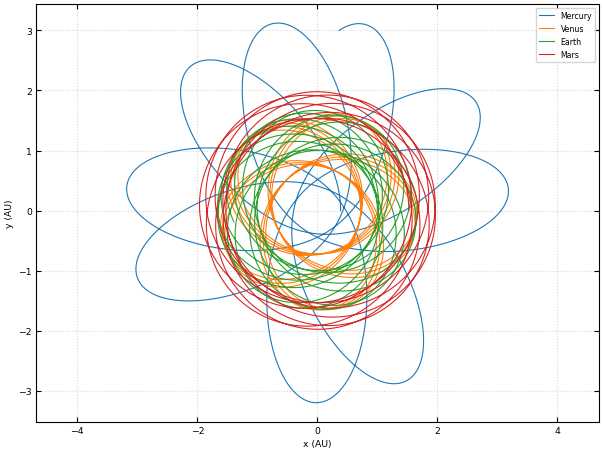

In [78]:
# orbit plot
PlanetName = ["Mercury", "Venus", "Earth", "Mars"]

plt.axis('equal')

for i in range(4):
    plt.plot(SolarSystem[:, 1+8*i], SolarSystem[:, 2+8*i], lw=.8, label=PlanetName[i])
# plt.scatter(0, 0, s=35, c='r', label="the Sun")
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.legend()
plt.grid()
# plt.savefig("solar-orbits-plummer.png", dpi=300)
plt.show()


In [3]:
ChainPlummer.shape


(2000, 401)

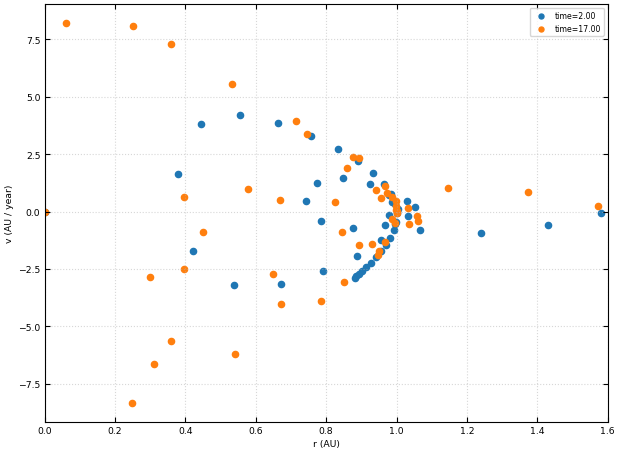

In [70]:
# phase space plot
time = 1990
dt = ChainPlummer[time+1, 0] - ChainPlummer[time, 0]
StateDate = np.zeros((50, 2))
# StateDate[0] = np.linalg.norm(ChainPlummer[1800, 1+8*i:4+8*i])

for time in np.arange(2, 20, 15)*100:
    # for time in [0]:
    for i in np.arange(49)+1:
        r = np.linalg.norm(ChainPlummer[time, 1+8*i:4+8*i], axis=-1)
        v = (np.linalg.norm(ChainPlummer[time+1, 1+8*i:4+8*i], axis=-1) - r) / dt
        StateDate[i, 0], StateDate[i, 1] = r, v
    plt.scatter(StateDate[:, 0], StateDate[:, 1], s=20, alpha=1, label=f"time={ChainPlummer[time, 0]:.2f}")

# plt.axis('equal')
plt.xlim(0, 1.6)
plt.xlabel('r (AU)')
plt.ylabel('v (AU / year)')
plt.legend()
plt.grid()
# plt.savefig("phase-space.png", dpi=300)
plt.show()


In [47]:
np.arange(0, 20, 5)*100


array([   0,  500, 1000, 1500])